In [20]:
import pandas as pd
import numpy as np

In [21]:
#Read the dataset

# games= pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/games.csv')
# player_play=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/player_play.csv')
# players=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/players.csv')
# plays=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/plays.csv')
# track_w1=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_1.csv')
# track_w2=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_2.csv')
# track_w3=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_3.csv')
# track_w4=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_4.csv')
# track_w5=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_5.csv')
# track_w6=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_6.csv')
# track_w7=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_7.csv')
# track_w8=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_8.csv')
# track_w9=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_9.csv')


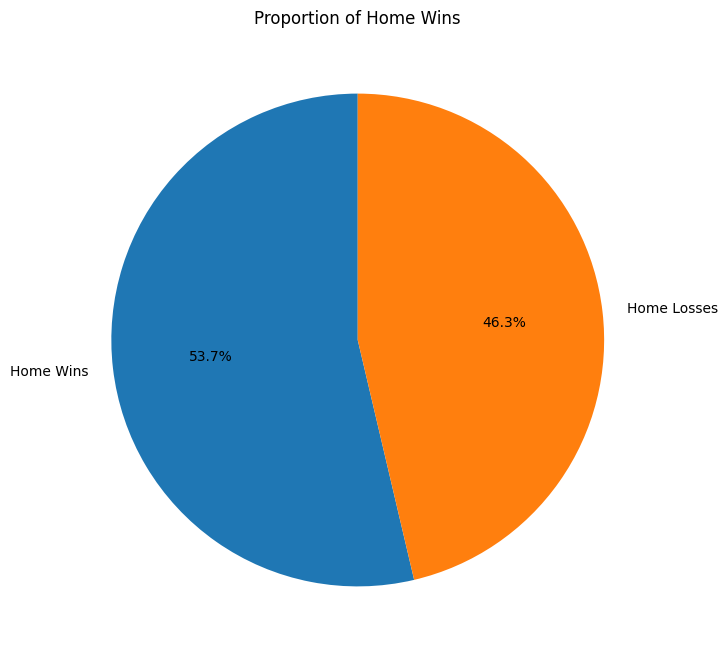

In [22]:
#EDA
import matplotlib.pyplot as plt
games['homeWin'] = games['homeFinalScore'] > games['visitorFinalScore']

# Count wins and losses
win_counts = games['homeWin'].value_counts()

# Prepare labels and values
labels = ['Home Wins', 'Home Losses']
sizes = [win_counts[True], win_counts[False]] if False in win_counts.index else [win_counts[True], 0]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Home Wins')
plt.show()


In [23]:
players.columns

Index(['nflId', 'height', 'weight', 'birthDate', 'collegeName', 'position',
       'displayName'],
      dtype='object')

In [24]:
plays['pff_passCoverage'].unique()

array(['Cover-3', 'Quarters', 'Cover-1', 'Cover 6-Left', 'Cover-2', nan,
       'Cover-0', 'Cover-3 Seam', 'Cover-6 Right', 'Goal Line',
       'Red Zone', '2-Man', 'Cover-3 Double Cloud', 'Bracket',
       'Miscellaneous', 'Cover-3 Cloud Left', 'Prevent', 'Cover-1 Double',
       'Cover-3 Cloud Right'], dtype=object)

In [ ]:
# Select relevant columns
passCoverage_analysis = players[['pff_passCoverage','yardsGained', 'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'expectedPointsAdded']]

# Group by isShotgun and calculate the mean for each group
passCoverage_grouped = passCoverage_analysis.groupby('pff_passCoverage').mean()

# Display the results
print(passCoverage_grouped)
# Plot the bar chart
passCoverage_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Metrics for Different Pass Coverage')
plt.xlabel('Pass Coverage')
plt.ylabel('Mean Value')
plt.xticks(ticks=[0, 1], rotation=0)
plt.legend(loc='best')
plt.show()

           yardsGained  homeTeamWinProbabilityAdded  \
isShotgun                                             
False         0.440757                     0.606962   
True          0.443777                     0.606485   

           visitorTeamWinProbilityAdded  expectedPointsAdded  
isShotgun                                                     
False                          0.393038             0.598718  
True                           0.393515             0.597819  


/var/folders/mp/349wty0d2_nc7qfh3kzx58cm0000gn/T/ipykernel_74673/718202804.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shotgun_analysis[columns_to_normalize] = scaler.fit_transform(shotgun_analysis[columns_to_normalize])


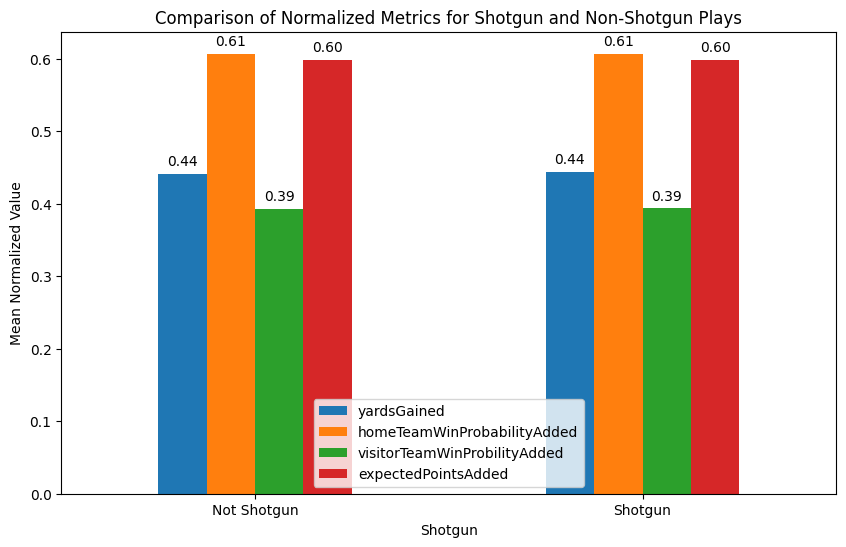

In [25]:
from sklearn.preprocessing import MinMaxScaler
plays['isShotgun'] = plays['playDescription'].str.contains(r'\(Shotgun\)', case=False, na=False)

# Select relevant columns
shotgun_analysis = plays[['isShotgun','yardsGained', 'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'expectedPointsAdded']]


# Select relevant columns for normalization
columns_to_normalize = ['yardsGained', 'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'expectedPointsAdded']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
shotgun_analysis[columns_to_normalize] = scaler.fit_transform(shotgun_analysis[columns_to_normalize])

# Group by isShotgun and calculate the mean for each group
shotgun_grouped_normalized = shotgun_analysis.groupby('isShotgun').mean()

# Display the results
print(shotgun_grouped_normalized)

# Plot the bar chart
ax = shotgun_grouped_normalized.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Normalized Metrics for Shotgun and Non-Shotgun Plays')
plt.xlabel('Shotgun')
plt.ylabel('Mean Normalized Value')
plt.xticks(ticks=[0, 1], labels=['Not Shotgun', 'Shotgun'], rotation=0)
plt.legend(loc='best')

# Add values on top of each column
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

In [26]:
# Group by quarter and isShotgun, then count the number of plays
shotgun_count_by_quarter = plays.groupby(['quarter', 'isShotgun'])['playId'].transform('count')

# Display the first few rows to verify the new column
shotgun_count_by_quarter.head()

0    2049
1    2521
2    2521
3    2075
4    2049
Name: playId, dtype: int64

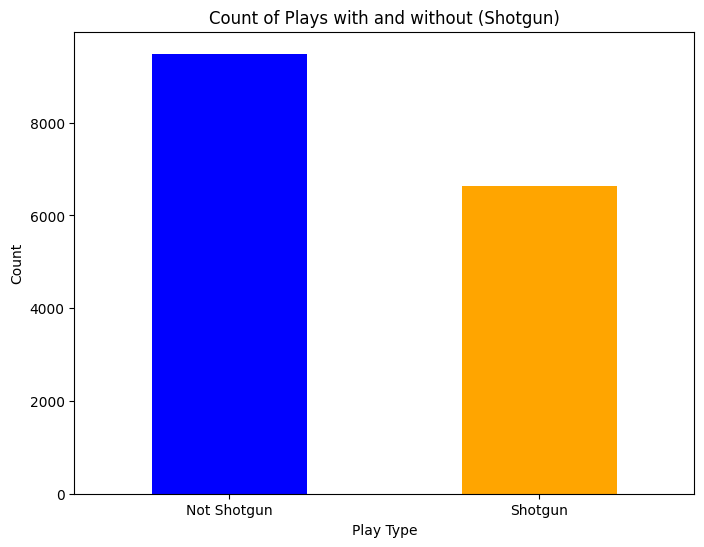

In [27]:
# Check if playDescription contains "(Shotgun)"
plays['isShotgun'] = plays['playDescription'].str.contains(r'\(Shotgun\)', case=False, na=False)

# Count the occurrences
shotgun_counts = plays['isShotgun'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
shotgun_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xticks(ticks=[0, 1], labels=['Not Shotgun', 'Shotgun'], rotation=0)
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.title('Count of Plays with and without (Shotgun)')
plt.show()

In [28]:
runConceptSecondary=plays['pff_runConceptSecondary']
#runConceptSecondary.value_counts().plot(kind='bar')
plays['playDescription'].tail()

16119    (12:49) (Shotgun) T.Lawrence pass incomplete s...
16120    (12:32) (Shotgun) K.Cousins pass incomplete de...
16121    (9:59) (Shotgun) P.Mahomes scrambles right end...
16122    (:45) C.Rush pass incomplete deep right to C.L...
16123    (15:00) Br.Hall up the middle for 34 yards, TO...
Name: playDescription, dtype: object

In [29]:
plays['isDoubleCloud'] = plays['pff_passCoverage'].str.contains('Cover-3 Double Cloud', case=False, na=False)
plays['isDoubleCloud'].value_counts()

isDoubleCloud
False    16115
True         9
Name: count, dtype: int64

pff_passCoverage
Cover-3                 4956
Cover-1                 3300
Quarters                2073
Cover-2                 1852
Cover 6-Left             692
Cover-6 Right            690
Cover-3 Seam             636
Cover-0                  605
Red Zone                 537
2-Man                    186
Goal Line                146
Bracket                   75
Cover-1 Double            54
Prevent                   46
Cover-3 Cloud Right       31
Cover-3 Cloud Left        30
Miscellaneous             14
Cover-3 Double Cloud       9
Name: count, dtype: int64


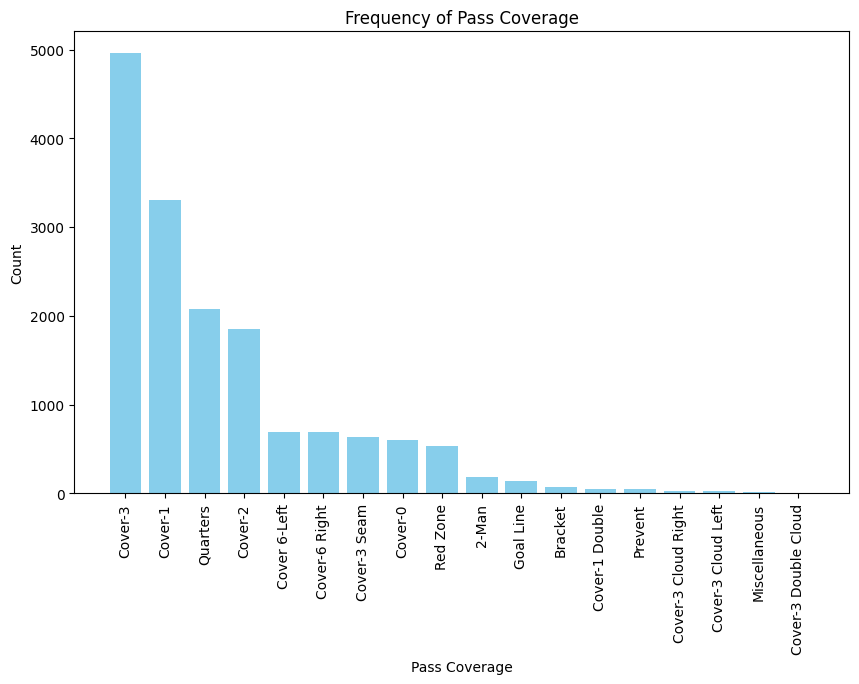

In [30]:
freq_table=plays['pff_passCoverage'].value_counts()
print(freq_table)

plt.figure(figsize=(10, 6))
plt.bar(freq_table.index, freq_table.values, color='skyblue')
plt.xlabel('Pass Coverage')
plt.ylabel('Count')
plt.title('Frequency of Pass Coverage')
plt.xticks(rotation=90)
plt.show()

                      yardsGained  homeTeamWinProbabilityAdded  \
pff_passCoverage                                                 
2-Man                    6.682796                    -0.001592   
Bracket                  7.053333                     0.004076   
Cover 6-Left             5.829480                    -0.000795   
Cover-0                  3.019835                     0.000489   
Cover-1                  5.781818                     0.000096   
Cover-1 Double           6.388889                     0.005034   
Cover-2                  6.039417                    -0.000699   
Cover-3                  5.623890                     0.000322   
Cover-3 Cloud Left       5.366667                     0.004580   
Cover-3 Cloud Right      6.903226                     0.002780   
Cover-3 Double Cloud    14.222222                    -0.099172   
Cover-3 Seam             6.058176                     0.001554   
Cover-6 Right            6.300000                    -0.000235   
Goal Line 

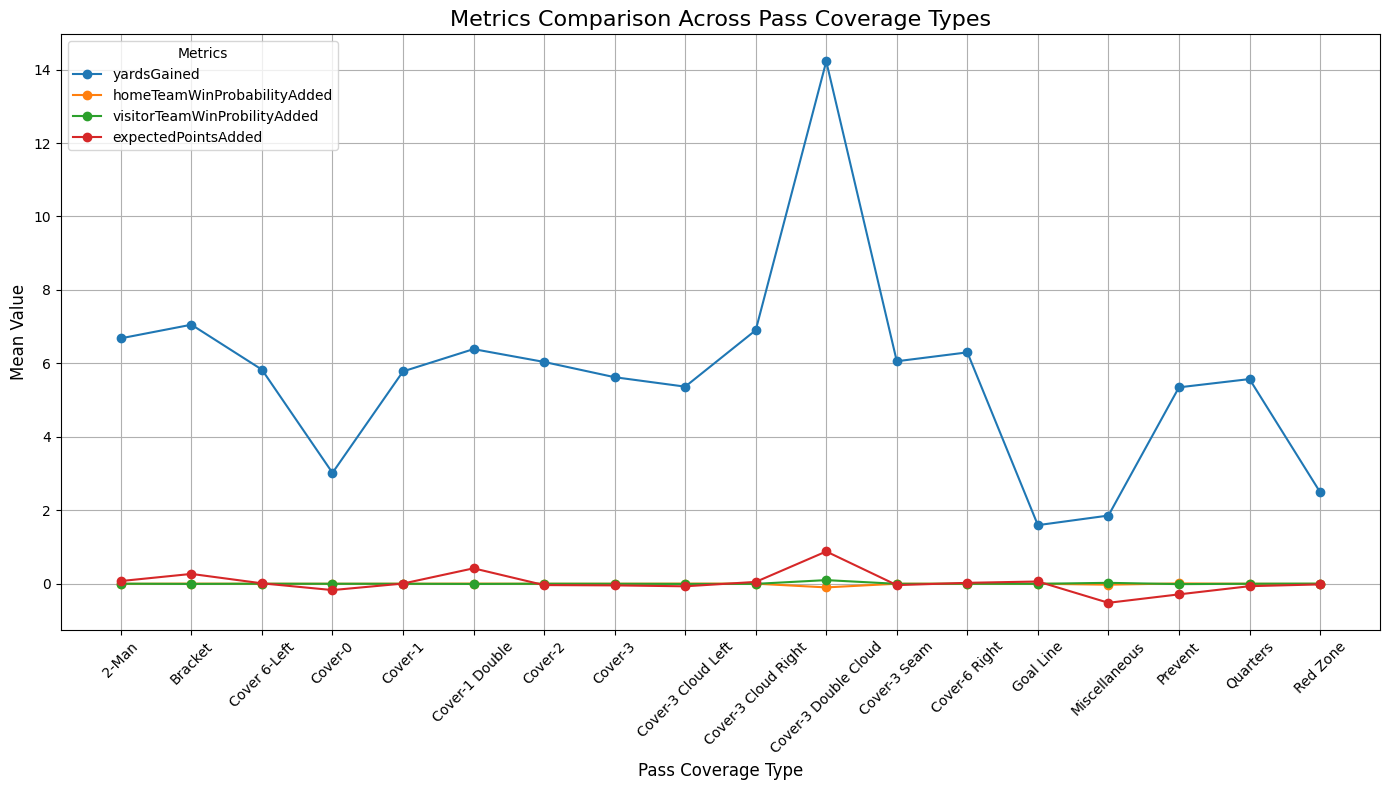

In [31]:
# Select relevant columns
passCoverage_analysis = plays[['pff_passCoverage','yardsGained', 'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'expectedPointsAdded']]

# Group by isShotgun and calculate the mean for each group
passCoverage_grouped = passCoverage_analysis.groupby('pff_passCoverage').mean()

# Display the results
print(passCoverage_grouped)

# Line chart visualization
plt.figure(figsize=(14, 8))

# Plot each metric as a separate line
for column in passCoverage_grouped.columns:
    plt.plot(passCoverage_grouped.index, passCoverage_grouped[column], marker='o', label=column)

# Enhance the chart
plt.title("Metrics Comparison Across Pass Coverage Types", fontsize=16)
plt.xlabel("Pass Coverage Type", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Metrics", loc='upper left')
plt.grid(True)

# Show the chart
plt.tight_layout()
plt.show()


<Axes: xlabel='teamAbbr'>

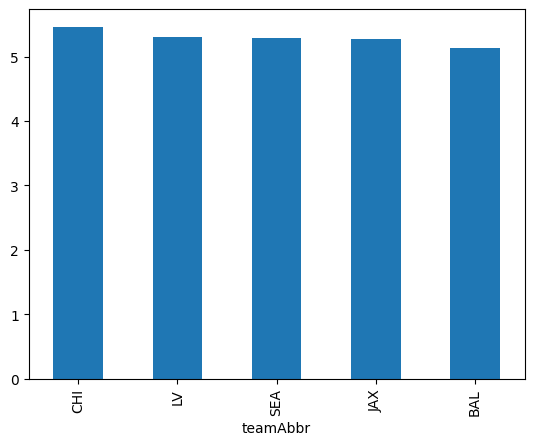

In [32]:
player_play[player_play['hadRushAttempt']==1].groupby(['teamAbbr']).rushingYards.mean().sort_values(ascending=False)[:5]
player_play[player_play['hadRushAttempt']==1].groupby(['teamAbbr']).rushingYards.mean().sort_values(ascending=False)[:5].plot(kind='bar')

<Axes: xlabel='teamAbbr'>

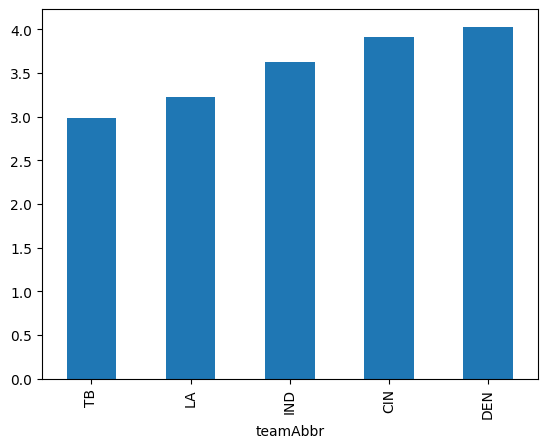

In [33]:
player_play[player_play['hadRushAttempt']==1].groupby(['teamAbbr']).rushingYards.mean().sort_values(ascending=True)[:5].plot(kind='bar')

In [34]:
player_play[player_play['hadPassReception']==1].groupby(['teamAbbr']).receivingYards.mean().sort_values(ascending=False)[:5]

teamAbbr
MIA    12.893720
ATL    12.713115
SF     12.546053
BUF    12.409091
PHI    12.393548
Name: receivingYards, dtype: float64

<Axes: xlabel='teamAbbr'>

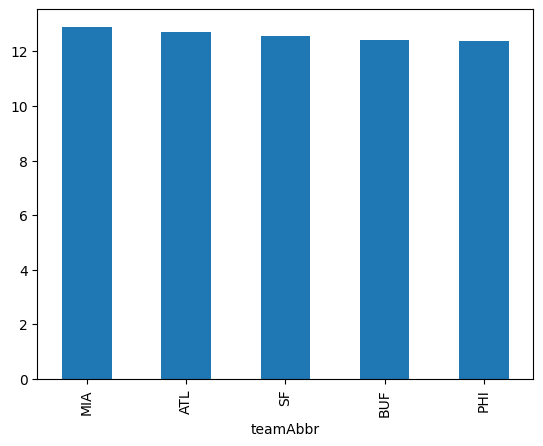

In [35]:
player_play[player_play['hadPassReception']==1].groupby(['teamAbbr']).receivingYards.mean().sort_values(ascending=False)[:5].plot(kind='bar')

In [36]:
avg_rush=player_play[player_play['hadRushAttempt']==1].groupby(['nflId']).rushingYards.mean().sort_values(ascending=False).rename('avg_rush_yards')
num_rush=player_play[player_play['hadRushAttempt']==1].groupby(['nflId']).rushingYards.count().sort_values(ascending=False).rename('num_rush')

In [49]:
rush_stat=pd.concat([avg_rush,num_rush],axis=1).rename_axis('nflId').reset_index()
rusher_stat=pd.merge(left=rush_stat,right=players[['nflId','displayName']],how='inner',on='nflId')
##get only Id and name from players
play_info=plays[['gameId','playId','offenseFormation']].groupby(['gameId','playId','offenseFormation']).count().reset_index(level= ['gameId','playId','offenseFormation'])

rush_stat[rush_stat['num_rush']>10].sort_values(by='avg_rush_yards',ascending=False)

,nflId,avg_rush_yards,num_rush
23,45244,8.657895,38
30,52708,7.909091,11
36,52443,7.393939,33
37,46506,7.117647,17
38,53440,7.089744,78
...,...,...,...
213,54668,2.058824,17
223,46173,2.000000,18
226,38538,1.666667,18
232,33084,1.090909,11


In [45]:
rusher_stat[rusher_stat['num_rush']>10].sort_values(by='avg_rush_yards',ascending=False)[:5]

,nflId,avg_rush_yards,num_rush,height,weight,birthDate,collegeName,position,displayName
23,45244,8.657895,38,6-2,221,1990-08-23,Brigham Young,QB,Taysom Hill
30,52708,7.909091,11,5-9,205,1996-09-12,Baylor,RB,Jamycal Hasty
36,52443,7.393939,33,5-10,211,1999-01-14,Georgia,RB,D'Andre Swift
37,46506,7.117647,17,5-11,202,1995-02-26,Tulane,RB,Dontrell Hilliard
38,53440,7.089744,78,6-3,223,NaN,Ohio State,QB,Justin Fields


In [126]:
player_rush_yards=player_play[player_play['hadRushAttempt']==1][['nflId','gameId','playId','rushingYards','teamAbbr']].groupby(['nflId','gameId','playId','teamAbbr']).sum().reset_index()
player_rush_att=player_play[player_play['hadRushAttempt']==1][['nflId','gameId','playId']].groupby(['nflId','gameId']).value_counts()
player_rush_stats=pd.merge(left=player_rush_yards,right=player_rush_att,how='inner',on=['nflId','gameId','playId'])
rush_stat=pd.concat([avg_rush,num_rush],axis=1).rename_axis('nflId').reset_index()
rusher_stat=pd.merge(left=player_rush_yards,right=players[['nflId','displayName']],how='inner',on='nflId')
##get only Id and name from players
play_info=plays[['gameId','playId','offenseFormation']].groupby(['gameId','playId','offenseFormation']).count().reset_index(level= ['gameId','playId','offenseFormation'])
rush_data=pd.merge(left=rusher_stat,right=play_info,how='inner',on=['playId','gameId'])

In [133]:
player_rec_yards=player_play[player_play['hadPassReception']==1][['nflId','gameId','playId','receivingYards','teamAbbr']].groupby(['nflId','gameId','playId','teamAbbr']).sum().reset_index()
rec_stat=pd.merge(left=player_rec_yards,right=players[['nflId','displayName']],how='inner',on='nflId')
rec_data=pd.merge(left=rec_stat,right=play_info,how='inner',on=['playId','gameId'])

In [138]:
rec_data[['offenseFormation','receivingYards']].groupby('offenseFormation').mean()

,receivingYards
offenseFormation,
EMPTY,10.341270
I_FORM,12.094675
JUMBO,3.533333
PISTOL,11.568182
SHOTGUN,10.730003
SINGLEBACK,12.289744
WILDCAT,9.900000


In [137]:
rec_data[['offenseFormation','receivingYards']].groupby('offenseFormation').count()

,receivingYards
offenseFormation,
EMPTY,756
I_FORM,169
JUMBO,15
PISTOL,132
SHOTGUN,3763
SINGLEBACK,780
WILDCAT,10


In [129]:
rush_data[['teamAbbr','rushingYards','offenseFormation']].groupby(['teamAbbr','offenseFormation']).mean()

rushingYards
teamAbbr offenseFormation              
ARI      EMPTY                 2.800000
         I_FORM                2.666667
         PISTOL                2.911765
         SHOTGUN               5.397163
         SINGLEBACK            2.315789
...                                 ...
WAS      JUMBO                 3.000000
         PISTOL                2.058824
         SHOTGUN               4.629310
         SINGLEBACK            4.106667
         WILDCAT               8.000000

[196 rows x 1 columns]

In [130]:
rush_data[['offenseFormation','rushingYards']].groupby(['offenseFormation']).mean().sort_values(by='rushingYards',ascending=False)

,rushingYards
offenseFormation,
EMPTY,6.473684
SHOTGUN,5.148045
SINGLEBACK,4.513148
I_FORM,4.417891
WILDCAT,4.148649
PISTOL,4.067130
JUMBO,2.400000


In [131]:
rush_data[['offenseFormation','rushingYards']].groupby(['offenseFormation']).count()

,rushingYards
offenseFormation,
EMPTY,95
I_FORM,749
JUMBO,105
PISTOL,432
SHOTGUN,2506
SINGLEBACK,2662
WILDCAT,74
